<a href="https://colab.research.google.com/github/hector3910/Laboratorio-1-Estructura-de-Datos-II/blob/main/Laboratorio_1_Estructura_de_Datos_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from typing import Any, Optional, Tuple
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Importación de la base de datos y breve análisis de la misma

In [ ]:
from IPython.display import Image
from graphviz import Digraph
dataf=pd.read_csv("dataset_movies.csv")
dataf #Vemos la base de datos

,Title,Worldwide Earnings,Domestic Earnings,Domestic Percent Earnings,Foreign Earnings,Foreign Percent Earnings,Year
0,Mission: Impossible II,546388108,215409889,39.4,330978219,60.6,2000
1,Gladiator,460583960,187705427,40.8,272878533,59.2,2000
2,Cast Away,429632142,233632142,54.4,196000000,45.6,2000
3,What Women Want,374111707,182811707,48.9,191300000,51.1,2000
4,Dinosaur,349822765,137748063,39.4,212074702,60.6,2000
...,...,...,...,...,...,...,...
4948,Buzz House: The Movie,2910112,0,0.0,2910112,100.0,2024
4949,We 12,2864154,0,0.0,2864154,100.0,2024
4950,Me Contro Te - Il film: Operazione Spie,2798501,0,0.0,2798501,100.0,2024
4951,Menudas piezas,2778043,0,0.0,2778043,100.0,2024


In [ ]:
dataf.shape #Vemos las dimensiones de la base de datos

(4953, 7)

In [ ]:
dataf.dtypes #Revisamos el tipo de cada variable

,0
Title,object
Worldwide Earnings,int64
Domestic Earnings,int64
Domestic Percent Earnings,float64
Foreign Earnings,int64
Foreign Percent Earnings,float64
Year,int64


In [ ]:
dataf.describe() #Resumen numérico de la base de datos

,Worldwide Earnings,Domestic Earnings,Domestic Percent Earnings,Foreign Earnings,Foreign Percent Earnings,Year
count,4.953000e+03,4.953000e+03,4953.000000,4.953000e+03,4953.000000,4953.000000
mean,1.174117e+08,4.422432e+07,35.587079,7.318696e+07,64.410337,2011.946901
std,1.988459e+08,7.652850e+07,30.758472,1.320714e+08,30.755835,7.211957
min,1.708839e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,2000.000000
25%,2.404894e+07,5.043300e+04,0.000000,1.307813e+07,42.300000,2006.000000
50%,4.773709e+07,1.768771e+07,36.900000,2.968182e+07,63.100000,2012.000000
75%,1.181142e+08,5.341286e+07,57.700000,7.124262e+07,99.900000,2018.000000
max,2.799439e+09,9.366622e+08,100.000000,1.993811e+09,100.000000,2024.000000


In [ ]:
dataf.isna().sum()  #Verificamos que no existan NA´s
#Al no existir NA´s, no es necesaria una imputación de nignuna fila

,0
Title,0
Worldwide Earnings,0
Domestic Earnings,0
Domestic Percent Earnings,0
Foreign Earnings,0
Foreign Percent Earnings,0
Year,0


Creación de la clase nodo.

In [ ]:
class Node:
    """
    Clase que representa un nodo en el árbol AVL.

    Args:
        name (Any): Título de la película.
        we (Any): Ingresos en la taquilla a nivel mundial.
        de (Any): Ingresos en la taquilla a nivel naciona.
        dpe (Any): : Ingresos porcentuales en la taquilla a nivel nacional
respecto a los ingresos mundiales.
        fe (Any): : Ingresos en la taquilla a nivel internacional.
        fpe (Any): Ingresos porcentuales en la taquilla a nivel
internacional respecto a los ingresos mundiales.
        year (Any): Año de estreno de la película.
        balance (int): Factor de equilibrio del nodo.
    """
    def __init__(self, name: Any, we:Any, de:Any, dpe:Any, fe:Any,  fpe:Any, year: Any, balance:int) -> None:
      self.balance = balance
      self.left: Optional["Node"] = None
      self.right: Optional["Node"] = None
      self.name = name
      self.year = year
      self.we = we
      self.de = de
      self.fe = fe
      self.dpe = dpe
      self.fpe = fpe

Se pasan los títulos a mayúsculas para determinar su orden alfabético en el árbol

In [ ]:

dataf["Title"] = dataf["Title"].str.upper()
dataf

,Title,Worldwide Earnings,Domestic Earnings,Domestic Percent Earnings,Foreign Earnings,Foreign Percent Earnings,Year
0,MISSION: IMPOSSIBLE II,546388108,215409889,39.4,330978219,60.6,2000
1,GLADIATOR,460583960,187705427,40.8,272878533,59.2,2000
2,CAST AWAY,429632142,233632142,54.4,196000000,45.6,2000
3,WHAT WOMEN WANT,374111707,182811707,48.9,191300000,51.1,2000
4,DINOSAUR,349822765,137748063,39.4,212074702,60.6,2000
...,...,...,...,...,...,...,...
4948,BUZZ HOUSE: THE MOVIE,2910112,0,0.0,2910112,100.0,2024
4949,WE 12,2864154,0,0.0,2864154,100.0,2024
4950,ME CONTRO TE - IL FILM: OPERAZIONE SPIE,2798501,0,0.0,2798501,100.0,2024
4951,MENUDAS PIEZAS,2778043,0,0.0,2778043,100.0,2024


In [ ]:
class AVL:
    """
    Clase que representa un árbol AVL.
    """
    def __init__(self, root: Optional["Node"] = None) -> None:
      self.root = root



    #Busqueda de un solo nodo
    def search_node(self, title: Any) -> Optional["Node"]:
        """
        Busca un nodo en el árbol AVL por su título.

        Args:
            title (Any): Título de la película a buscar.

        Returns:
            Optional["Node"]: Nodo encontrado o None si no se encuentra.
        """
        p= self.root #Se inicia la búsqueda desde la raíz
        title=title.upper() #Se convierten los nombres a mayúscula para una mejor comparación
        while p is not None: #Recorre el árbol dependiendo de si el dato a buscar es mayor o menor al nodo con el que se realiza la comparación
            if title == p.name:
                return p
            else:
                if title < p.name:
                    p = p.left
                else:
                    p = p.right
        return p #Devuelve None si no lo encontró. Si lo encontró, devuelve el nodo del dato que se está buscando

    #Busqueda de un nodo y su padre
    def search(self, title: Any) -> Tuple[Optional["Node"], Optional["Node"]]:
        """
        Busca un nodo en el árbol por su título y devuelve el nodo y su padre.

        Args:
            title (Any): Título de la película a buscar.

        Returns:
            Tuple[Optional["Node"], Optional["Node"]]: El nodo y su padre si se encuentra, None y el último nodo recorrido en caso contrario.
        """
        p, pad = self.root, None
        title=title.upper()
        while p is not None:
            if title == p.name:
                return p, pad
            else:
                pad = p
                if title < p.name:
                    p = p.left
                else:
                    p = p.right
        return p, pad #Devuelve el padre del nodo buscado, y el nodo buscado. En caso de que no lo encuentre, regresa None y el último nodo recorrido.

    #Balance de los nodos
    def balance_node(self, node: Optional["Node"]) -> None:
      """
      Calcula el factor de equilibrio detodos los nodos del árbol.

      Args:
          node (Optional["Node"]): Nodo a partir del cual se calculará el factor de equilibrio.
      """
      if node is not None:
        node.balance=self.height(node.right)-self.height(node.left) #A cada nodo se le asigna su balance
        self.balance_node(node.left)
        self.balance_node(node.right)

    #Balanceo
    def auto_balance(self, node: Optional["Node"]) -> None:
       """
      Realiza el autobalanceo del árbol a partir de un nodo dado.

      Args:
          node (Optional["Node"]): Nodo a partir del cual se realizará el autobalanceo.
      """
      p = self.root
      aux = node
      cont=0
      while node != p: #A partir del nodo que se envíe, se verifica el balance de su padre, hasta llegar a la raíz. En caso de que haya un desbalanceo, se realiza la rotación que se necesite
        cont+=1
        if (self.height(node.right) - self.height(node.left)) >= 2 or (self.height(node.right) - self.height(node.left)) <= -2:
            if (self.height(node.right) - self.height(node.left)) >= 2:
                if (self.height(aux.right) - self.height(aux.left)) in [0, 1]:
                    node = self.simple_left_rotation(node)
                else:
                    node = self.double_right_left_rotation(node)
            else:
                if (self.height(aux.right) - self.height(aux.left)) in [0, -1]:
                    node = self.simple_right_rotation(node)
                else:
                    node = self.double_left_right_rotation(node)
        aux, node = self.search(node.name)

      # Verifica si la raíz requiere balanceo después del while, ya que en el while anterior no se verifica el balance de la raíz
      if node == p: #Se le pone un valor a la variable aux para poder hacer una comparación
        if(cont==0):
          if(node.right==None):
            aux=node.left
          else:
            if(node.left==None):
              aux=node.right
            else:
              aux=node.right

        if (self.height(node.right) - self.height(node.left)) >= 2 or (self.height(node.right) - self.height(node.left)) <= -2:
            if (self.height(node.right) - self.height(node.left)) >= 2:
                if (self.height(aux.right) - self.height(aux.left)) in [0, 1]:
                    self.root = self.simple_left_rotation(node)
                else:
                    self.root = self.double_right_left_rotation(node)
            else:
                if (self.height(aux.right) - self.height(aux.left)) in [0, -1]:
                    self.root = self.simple_right_rotation(node)
                else:
                    self.root = self.double_left_right_rotation(node)




    #Busqueda del nombre en el dataset
    def search_node_in_dataset(self, name: Any) -> Optional["Node"]: #Retorna el nodo con la información del dataset correspondiente a la película que se busque
      """
      Busca una película en el dataset por su nombre y devuelve un nodo con la información de la película.

      Args:
          name (Any): Nombre de la película a buscar.

      Returns:
          Optional["Node"]: Nodo con la información de la película si se encuentra, None en caso contrario.
      """
      for i in range(4953):
        if(dataf["Title"][i]==name):
          return Node(name,dataf["Worldwide Earnings"][i],dataf["Domestic Earnings"][i],
            dataf["Domestic Percent Earnings"][i],dataf["Foreign Earnings"][i],dataf["Foreign Percent Earnings"][i],dataf["Year"][i],0)
      return None
    #Inserción de un nodo
    def insert(self, name: Any) -> bool:
        """
        Inserta un nodo en el árbol AVL por su título.

        Args:
            name (Any): Título de la película a insertar.

        Returns:
            bool: True si la inserción fue exitosa, False en caso contrario.
        """
        name=name.upper()
        to_insert= self.search_node_in_dataset(name)
        if self.root is None:
            self.root = to_insert
            self.root.balance = 0
            self.visualize_tree() #Se grafica el árbol
            return True
        else:
            p, pad = self.search(name)
            if p is not None:
                return False
            else:
                if name < pad.name:
                    pad.left = to_insert

                else:
                    pad.right = to_insert
                self.auto_balance(pad) #Se balancea el árbol a partir del padre del nodo insertado, ya que el balance de los otros nodos no se ve afectado
                self.visualize_tree() #Se grafica el árbol
                return True


    #Eliminación de un nodo
    def delete(self, data: Any, mode: bool = True) -> bool:
        """
        Elimina un nodo del árbol.

        Args:
            data (Any): Nombre de la película a eliminar.
            mode (bool, optional): Modo de eliminación. Si es True, se utiliza el predecesor, si es False, el sucesor. Por defecto se utiliza en True.

        Returns:
            bool: True si se eliminó correctamente, False en caso contrario.
        """
        data=data.upper()
        p, pad = self.search(data)
        if p is not None:
            if p.left is None and p.right is None:
              if(pad is None):
                self.root=None
              else:
                if p == pad.left:
                    pad.left = None
                else:
                    pad.right = None
                del p
                self.auto_balance(pad) #Se balancea el árbol a partir del padre del nodo eliminado, ya que el balance de los otros nodos no se ve afectado
            elif p.left is None and p.right is not None:
              if(pad is None):
                self.root=p.right
              else:
                if p == pad.left:
                    pad.left = p.right
                else:
                    pad.right = p.right
                del p
                self.auto_balance(pad) #Se balancea el árbol a partir del padre del nodo eliminado, ya que el balance de los otros nodos no se ve afectado
            elif p.left is not None and p.right is None:
              if(pad is None):
                self.root=p.left
              else:
                if p == pad.left:
                    pad.left = p.left
                else:
                    pad.right = p.left
                del p
                self.auto_balance(pad) #Se balancea el árbol a partir del padre del nodo eliminado, ya que el balance de los otros nodos no se ve afectado
            else:
                if mode:
                    pred, pad_pred, son_pred = self.__pred(p)
                    p.name = pred.name
                    p.we = pred.we
                    p.de = pred.de
                    p.dpe = pred.dpe
                    p.fe = pred.fe
                    p.fpe = pred.fpe
                    p.year = pred.year
                    if p == pad_pred:
                        pad_pred.left = son_pred
                    else:
                        pad_pred.right = son_pred
                    del pred
                    self.auto_balance(pad_pred) #Se balancea el árbol a partir del padre del predecesor, ya que el predecesor del nodo a eliminar es el que se retira del árbol luego de copiar su información, ya que el balance de los otros nodos no se ve afectado
                else:
                    sus, pad_sus, son_sus = self.__sus(p)
                    p.name = sus.name
                    p.we = sus.we
                    p.de = sus.de
                    p.dpe = sus.dpe
                    p.fe = sus.fe
                    p.fpe = sus.fpe
                    p.year = sus.year
                    if p == pad_sus:
                        pad_sus.right = son_sus
                    else:
                        pad_sus.left = son_sus
                    del sus
                    self.auto_balance(pad_sus) #Se balancea el árbol a partir del padre del sucesor, ya que el sucesor del nodo a eliminar es el que se retira del árbol luego de copiar su información, ya que el balance de los otros nodos no se ve afectado
            self.visualize_tree() #Se grafica el árbol
            return True
        return False

    #Función que devuelve el predecesor, su padre y su hijo, de un nodo
    def __pred(self, node: "Node") -> Tuple["Node", "Node", Optional["Node"]]:
        """
        Encuentra el predecesor de un nodo, su padre y su hijo.

        Args:
            node ("Node"): Nodo del que se buscará el predecesor.

        Returns:
            Tuple["Node", "Node", Optional["Node"]]: Predecesor, padre del predecesor e hijo del predecesor.
        """
        p, pad = node.left, node
        while p.right is not None:
            p, pad = p.right, p
        return p, pad, p.left
    #Función que devuelve el sucesor ,su padre y su hijo, de un nodo
    def __sus(self, node: "Node") -> Tuple["Node", "Node", Optional["Node"]]:
        """
        Encuentra el sucesor de un nodo, su padre y su hijo.

        Args:
            node ("Node"): Nodo del que se buscará el sucesor.

        Returns:
            Tuple["Node", "Node", Optional["Node"]]:Sucesor, padre del sucesor e hijo del sucesor.
        """
        p, pad = node.right, node
        while p.left is not None:
            p, pad = p.left, p
        return p, pad, p.right


    #Recorrido por niveles recursivo
    def levels(self) -> None:
      """
      Realiza un recorrido por niveles en el árbol AVL.
      """
        self.__levels_r(None,None,None)

    def __levels_r(self,p: Optional["Node"] ,q:Any,raiz: Optional["Node"]) -> None:
      """
        Función recursiva para el recorrido por niveles.

        Args:
            p (Optional["Node"]): Nodo actual.
            q (Any): Cola de nodos.
            raiz (Optional["Node"]): Raíz del árbol.
        """
      if(self.root is None):
        print("Árbol vacío")
      else:
        if(q==None):
          q=[]
          p=self.root
          q.append(p)
        if(len(q)==0):
          return None
        p=q.pop(0)
        print(p.name, end = ' ,')
        if p.left is not None:
          q.append(p.left)
        if p.right is not None:
          q.append(p.right)
        self.__levels_r(p,q,raiz)


    #Altura del arbol
    def height(self, node: Optional["Node"]) -> int:
      """
      Calcula la altura de un nodo en el árbol AVL.

      Args:
          node (Optional["Node"]): Nodo del que se calculará la altura.

      Returns:
          int: Altura del nodo.
      """
      if node is None:
          return 0
      else:
          return 1 + max(self.height(node.left), self.height(node.right))

    #Metodos para el balance del arbol
    #Funcion rotacion simple izquierda
    def simple_left_rotation(self, node: Optional["Node"]) -> Node:
      """
      Realiza una rotación simple a la izquierda en el árbol AVL.

      Args:
          node (Optional["Node"]): Nodo raiz del subárbol en el cual se realizará la rotación.

      Returns:
          Node: Nodo raíz del subárbol luego de la rotación.
      """
      p,q=self.search(node.name)
      if(q is None):
        aux=node.right
        node.right=aux.left
        aux.left=node
        return aux
      else:
        aux=node.right
        node.right=aux.left
        aux.left=node
        if(node==q.left):
          q.left=aux
        else:
          q.right=aux
        return aux
    #Funcion rotacion simple derecha
    def simple_right_rotation(self, node: Optional["Node"]) -> Node:
      """
      Realiza una rotación simple a la derecha en el árbol AVL.

      Args:
          node (Optional["Node"]): Nodo raiz del subárbol en el cual se realizará la rotación.

      Returns:
          Node: Nodo raíz del subárbol luego de la rotación.
      """
      p,q=self.search(node.name)
      if(q is None):
        aux=node.left
        node.left=aux.right
        aux.right=node
        return aux
      else:
        aux=node.left
        node.left=aux.right
        aux.right=node
        if(node==q.left):
          q.left=aux
        else:
          q.right=aux
        return aux

    #Funcion rotacion doble derecha izquierda
    def double_right_left_rotation(self, node: Optional["Node"]) -> Node:
      """
      Realiza una rotación doble derecha-izquierda.

      Args:
          node (Optional["Node"]): Nodo sobre el que se realizará la rotación.

      Returns:
          Node: Nodo que queda como raíz de la subárbol después de la rotación.
      """
      node.right=self.simple_right_rotation(node.right)
      return self.simple_left_rotation(node)

    #Funcion rotacion doble izquierda derecha
    def double_left_right_rotation(self, node: Optional["Node"]) -> Node:
      """
      Realiza una rotación doble izquierda-derecha.

      Args:
          node (Optional["Node"]): Nodo sobre el que se realizará la rotación.

      Returns:
          Node: Nodo que queda como raíz de la subárbol después de la rotación.
      """
      node.left=self.simple_left_rotation(node.left)
      return self.simple_right_rotation(node)


    #Nivel de un nodo
    def node_level(self, node: Optional["Node"]) -> int:
        """
        Calcula el nivel de un nodo en el árbol AVL.

        Args:
            node (Optional["Node"]): Nodo del que se calculará el nivel.

        Returns:
            int: Nivel del nodo.
        """
        p= self.root
        cont=0
        if(node is None):
          return -1
        while p is not None:
            if node == p:
                return cont
            else:

                if node.name < p.name:
                    p = p.left
                else:
                    p = p.right
                cont+=1

    #Factor de equilibrio del nodo
    def balance_factor(self, node: Optional["Node"]) -> None:
        """
        Busca el factor de equilibrio de un nodo en el árbol AVL.

        Args:
            node (Optional["Node"]): Nodo del que se calculará el factor de equilibrio.
        """
        if(node is None):
          print("Esta película no está en el árbol")
        else:
          print(node.balance)

    #Punto 4
    def multiple_search(self, year:int, valor:int) -> list:
        """
        Busca películas que fueron estrenadas en un año dado por el usuario,
        las películas cuyo porcentaje de ingresos a nivel nacional es
        menor que el porcentaje de ingresos a nivel internacional y las películas cuyos
        ingresos a nivel internacional son mayores
        o iguales que un valor dado por el usuario.

        Args:
            year (int): Año de la película.
            valor (int): Valor mínimo de ganancias extranjeras.

        Returns:
            list: Lista de nodos que cumplen con los criterios.
        """
        q = []
        self.__multiple_search(self.root, year, q, valor)
        return q

    def __multiple_search(self, node:Optional["Node"],year: int ,q:list, valor: int) -> None:
      """
        Función recursiva para la búsqueda múltiple.

        Args:
            node (Optional["Node"]): Nodo actual.
            year (int): Año de la película.
            q (list): Lista de nodos que cumplen con los criterios.
            valor (int): Valor mínimo de ganancias extranjeras.
        """
      if node is not None:
        if(node.year==year and node.dpe<node.fpe and node.fe>=valor):
          q.append(node)
        self.__multiple_search(node.left, year, q, valor)
        self.__multiple_search(node.right, year, q, valor)

    def abu_tio_padre(self, name:Any)-> None :
      """
      Busca el padre, tío y abuelo de un nodo.

      Args:
          name (Any): Nombre de la película a buscar.
      """
      name=name.upper()
      p,pad=avl.search(name)
      if(p is None):
          print("No se encontro")
      else:
        print(p.name)
        if (pad is None):
            print("No tiene padre")
        else:
          print("Su padre es :"+pad.name)
          p1,abu=avl.search(pad.name)
          if (abu is None):
              print("No tiene abuelo")
              print("No tiene tio")
          else:
            if(abu.left==p1 and abu.right!=None):
              print("Su tío es: "+abu.right.name)
            else:
              if(abu.left!=None and abu.right==None):
                print("No tiene tio")
              else:
                if(abu.right==p1 and abu.left!=None):
                  print("Su tío es: "+abu.left.name)
                else:
                  print("No tiene tio")
            print("Su abuelo es :"+abu.name)

    #Visualizacion del árbol
    def __visualize_node(self, dot, node, node_id):
       """
      Función recursiva para visualizar un nodo y sus descendientes.

      Args:
          dot: Objeto Digraph de graphviz.
          node: Nodo actual.
          node_id: ID del nodo.
      """
      if node is None:
          return

      #Se crea el nodo gráficamente con la información del dataset
      dot.node(str(node_id), f"{node.name}\nYear: {node.year}\nWorldwide Earnings: {node.we}\nDomestic Earnings: {node.de}\nForeign Earnings: {node.fe}\nDomestic Percent Earnings: {node.dpe}\nForeign Percent Earnings: {node.fpe}", shape="box")
      if node.left:
          dot.edge(str(node_id), str(node_id + '_left'), label='left') #Se crea una arista del nodo actual al hijo izquierdo, el cual se crea en la siguiente linea, se le titula left a la arista para mayor comprensión
          self.__visualize_node(dot, node.left, node_id + '_left')

      if node.right:
          dot.edge(str(node_id), str(node_id + '_right'), label='right') #Se crea una arista del nodo actual al hijo derecho, el cual se crea en la siguiente linea, se le titula right a la arista para mayor comprensión
          self.__visualize_node(dot, node.right, node_id + '_right')
    def visualize_tree(self):
      """
      Visualiza el árbol utilizando graphviz.
      """
      dot_data = Digraph(comment='AVL Tree')
      self.__visualize_node(dot_data, self.root, '') #Creación gráfica del árbol
      graph = dot_data.render('avl_tree', format='png') #Crea la imagen en formato .png
      display(Image(filename='avl_tree.png')) #Muestra el árbol generado



In [ ]:
avl = AVL()


Inserción de nodos de ejemplo

MISSION: IMPOSSIBLE II
GLADIATOR
CAST AWAY
WHAT WOMEN WANT
DINOSAUR
HOW THE GRINCH STOLE CHRISTMAS
MEET THE PARENTS
THE PERFECT STORM
X0MEN
WHAT LIES BENEATH
SCARY MOVIE
CHARLIE'S ANGELS
ERIN BROCKOVICH
UNBREAKABLE
GONE IN 60 SECONDS
CHICKEN RUN
VERTICAL LIMIT
THE PATRIOT
CROUCHING TIGER HIDDEN DRAGON
MISS CONGENIALITY


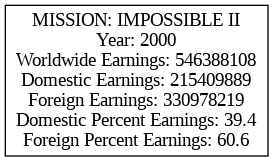

True


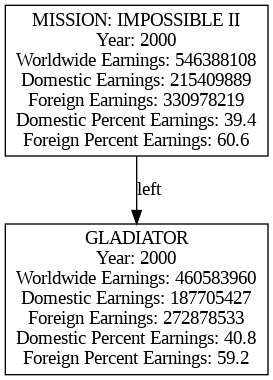

True


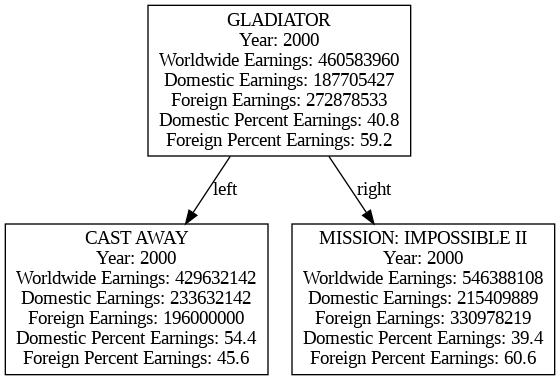

True


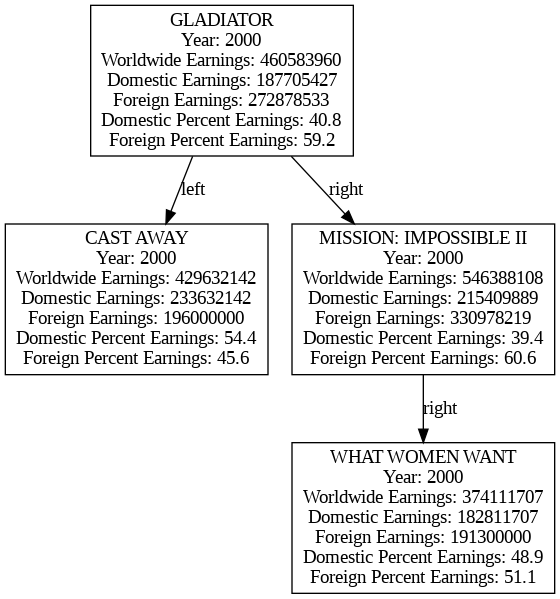

True


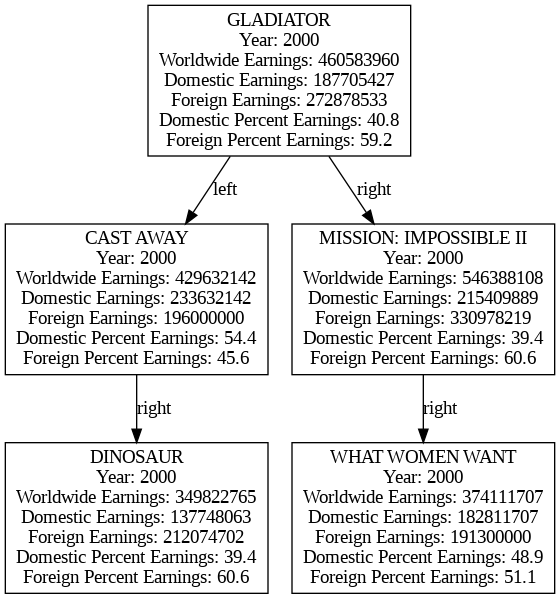

True


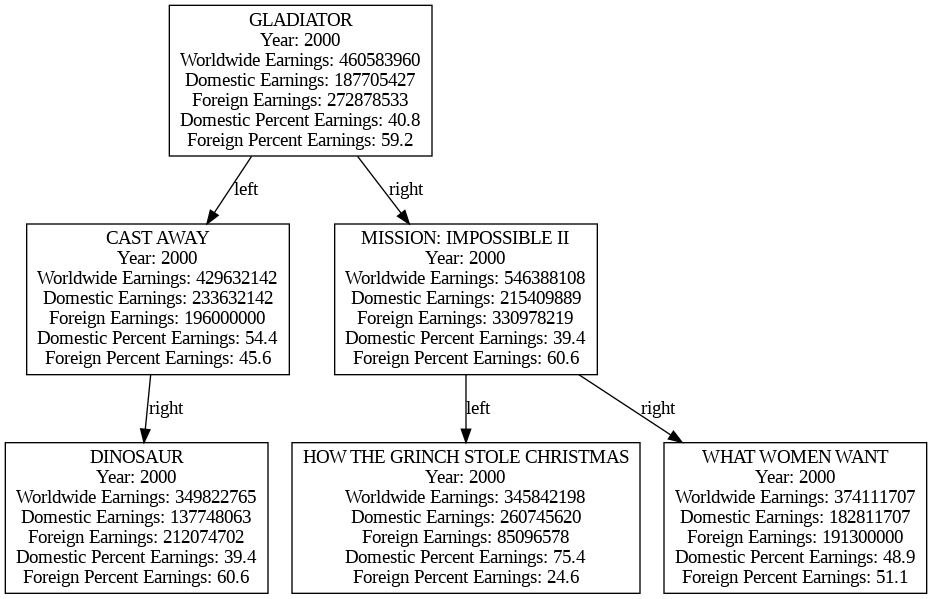

True


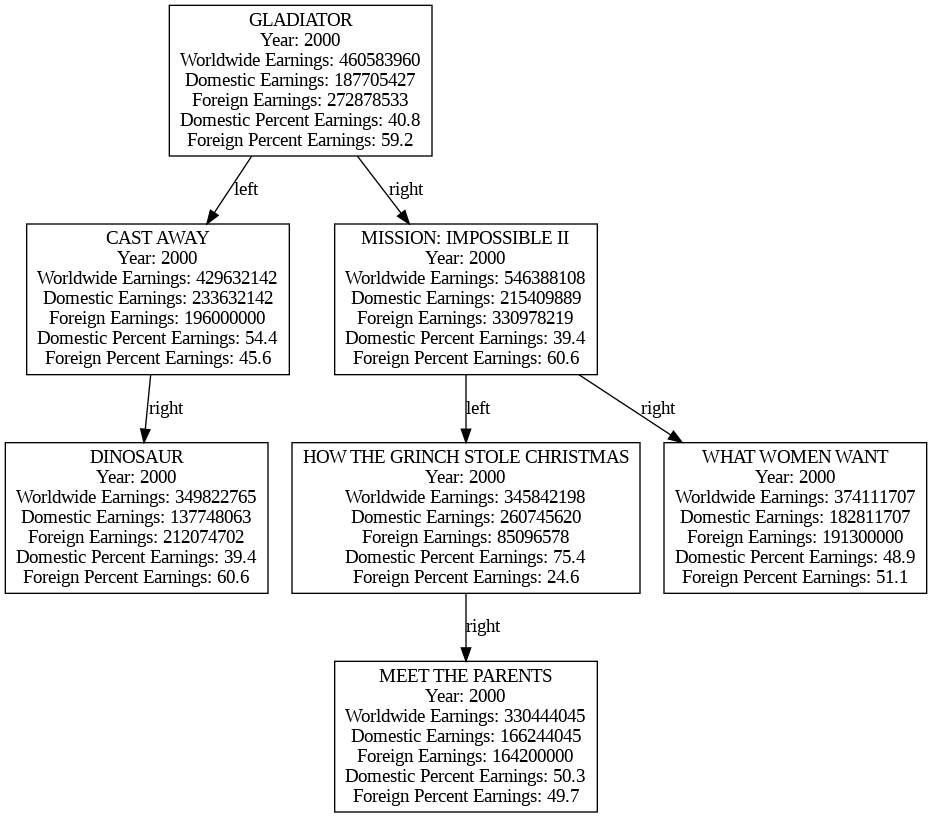

True


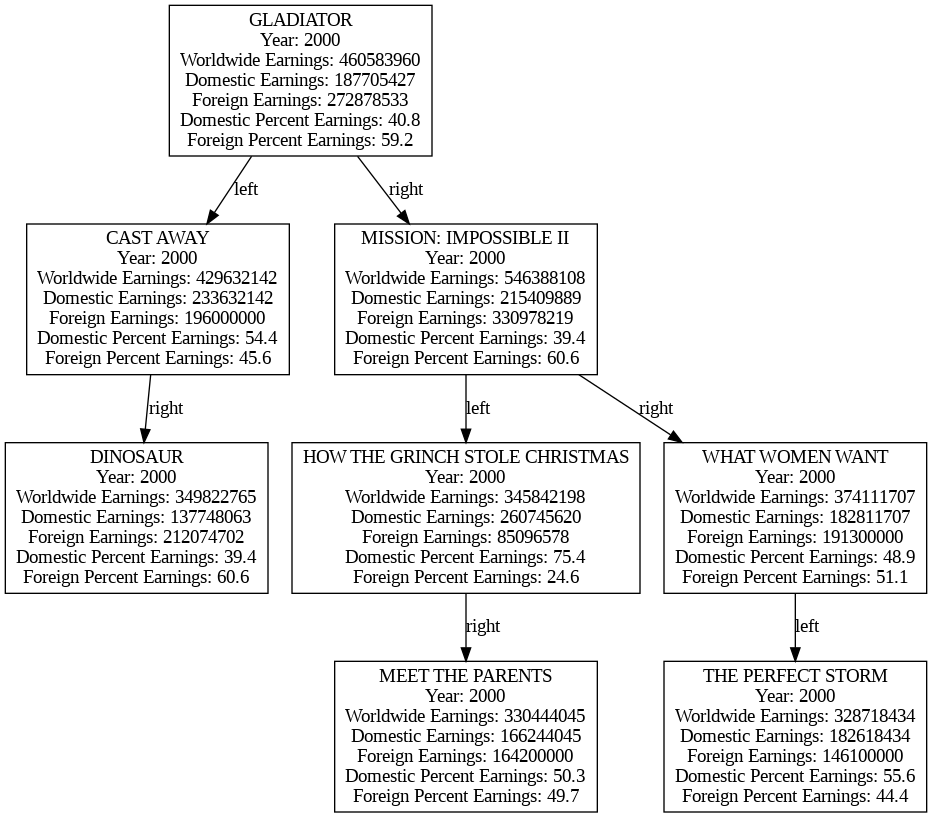

True


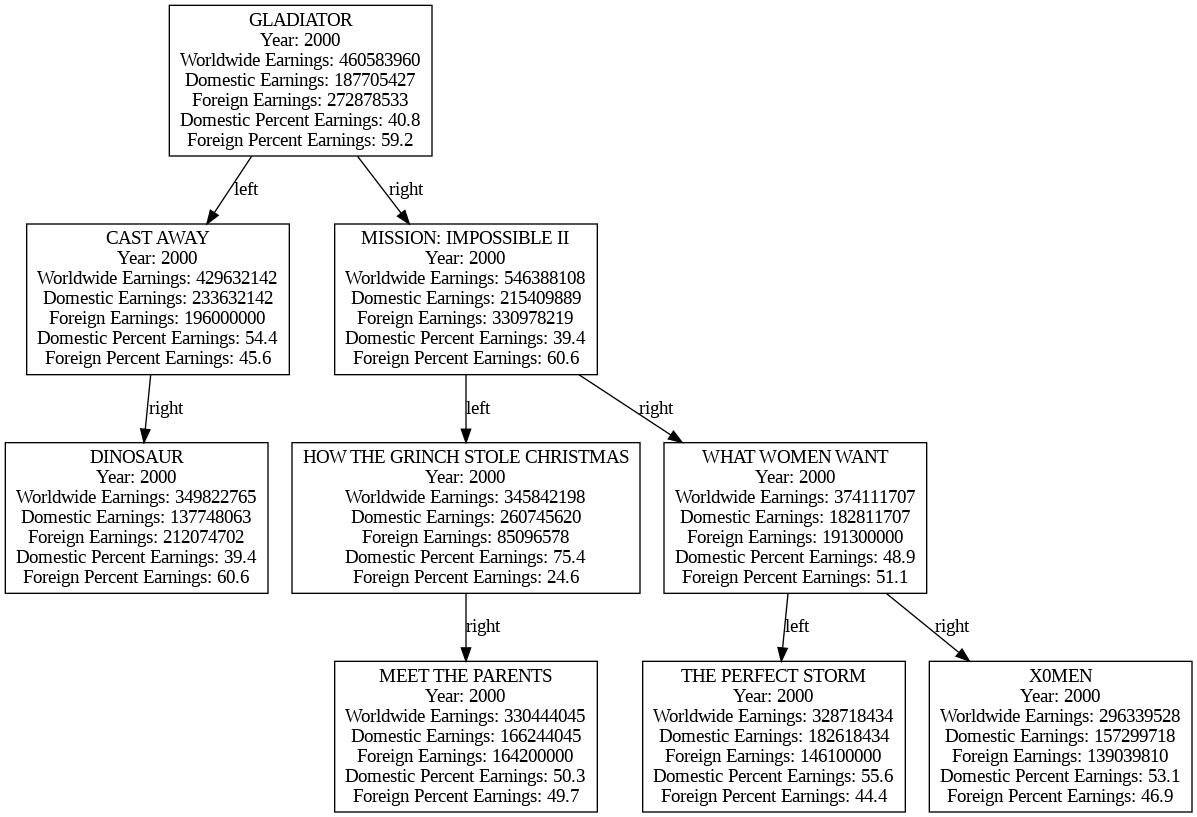

True


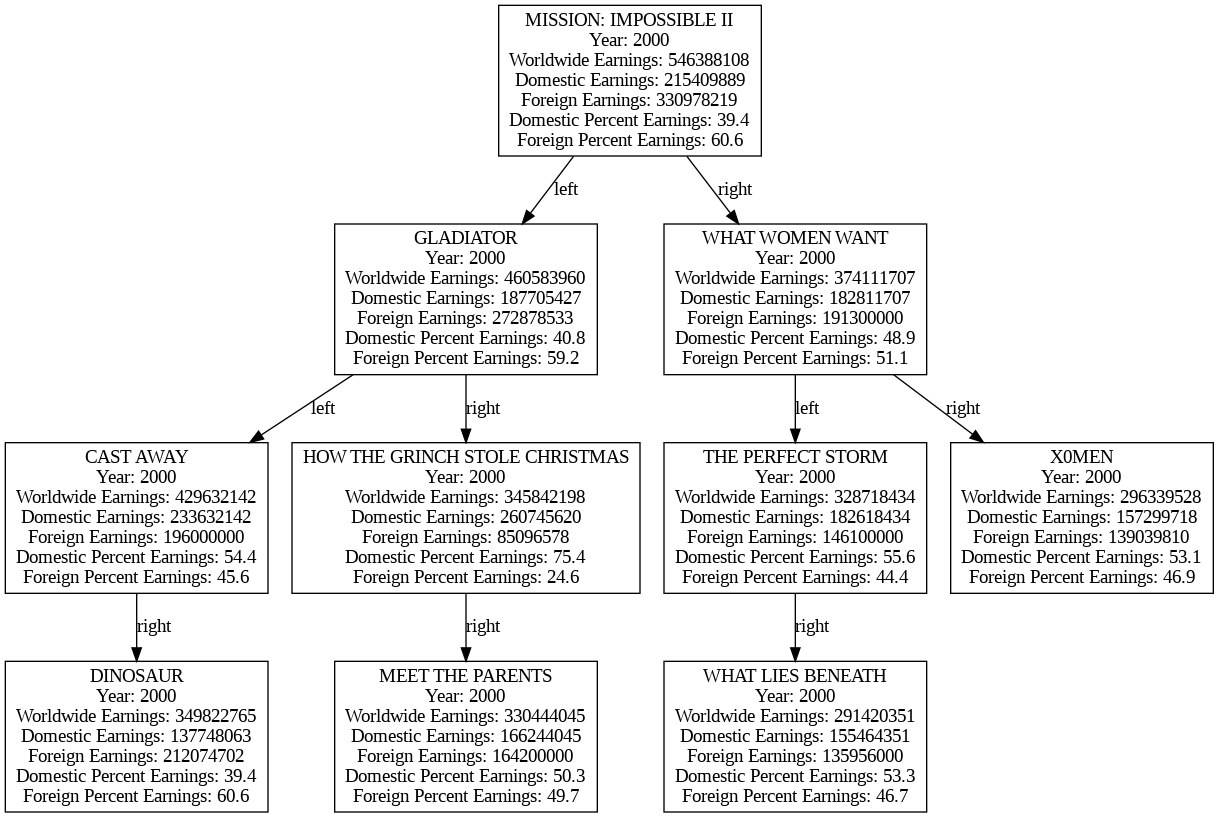

True


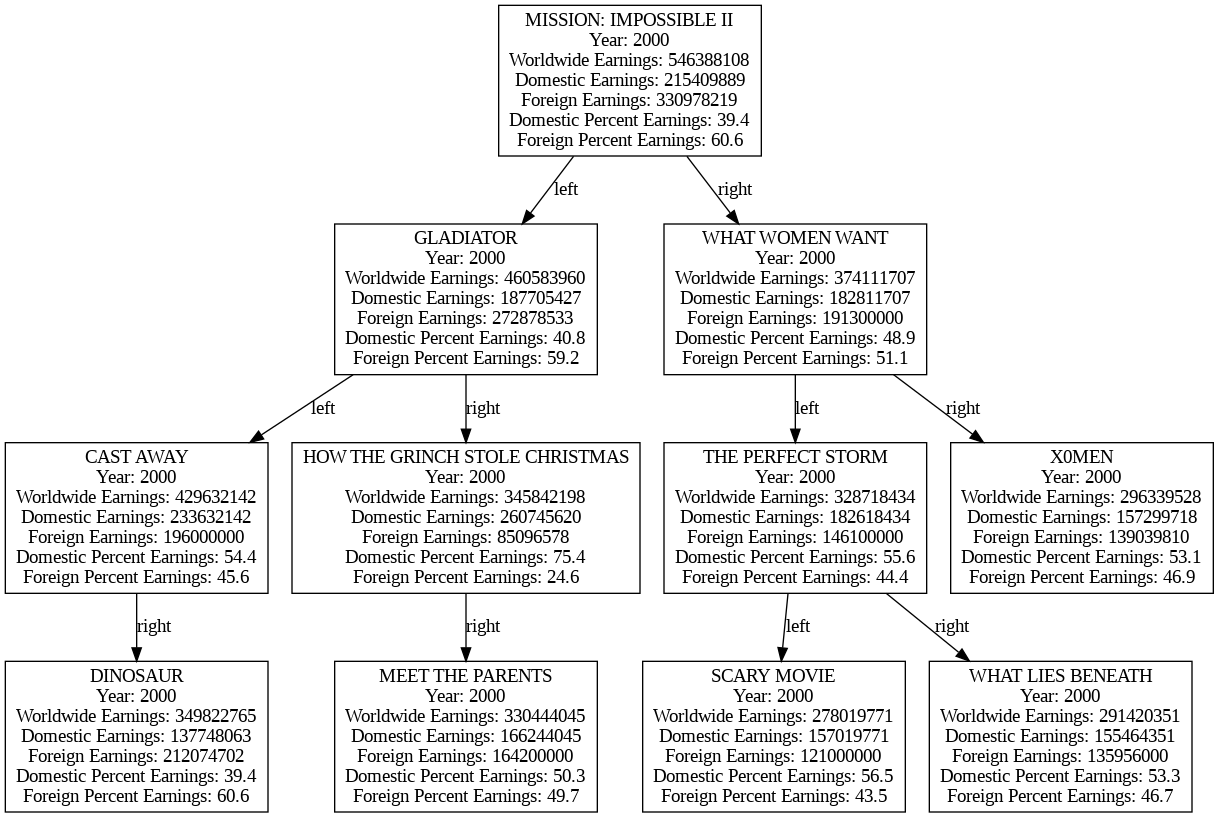

True


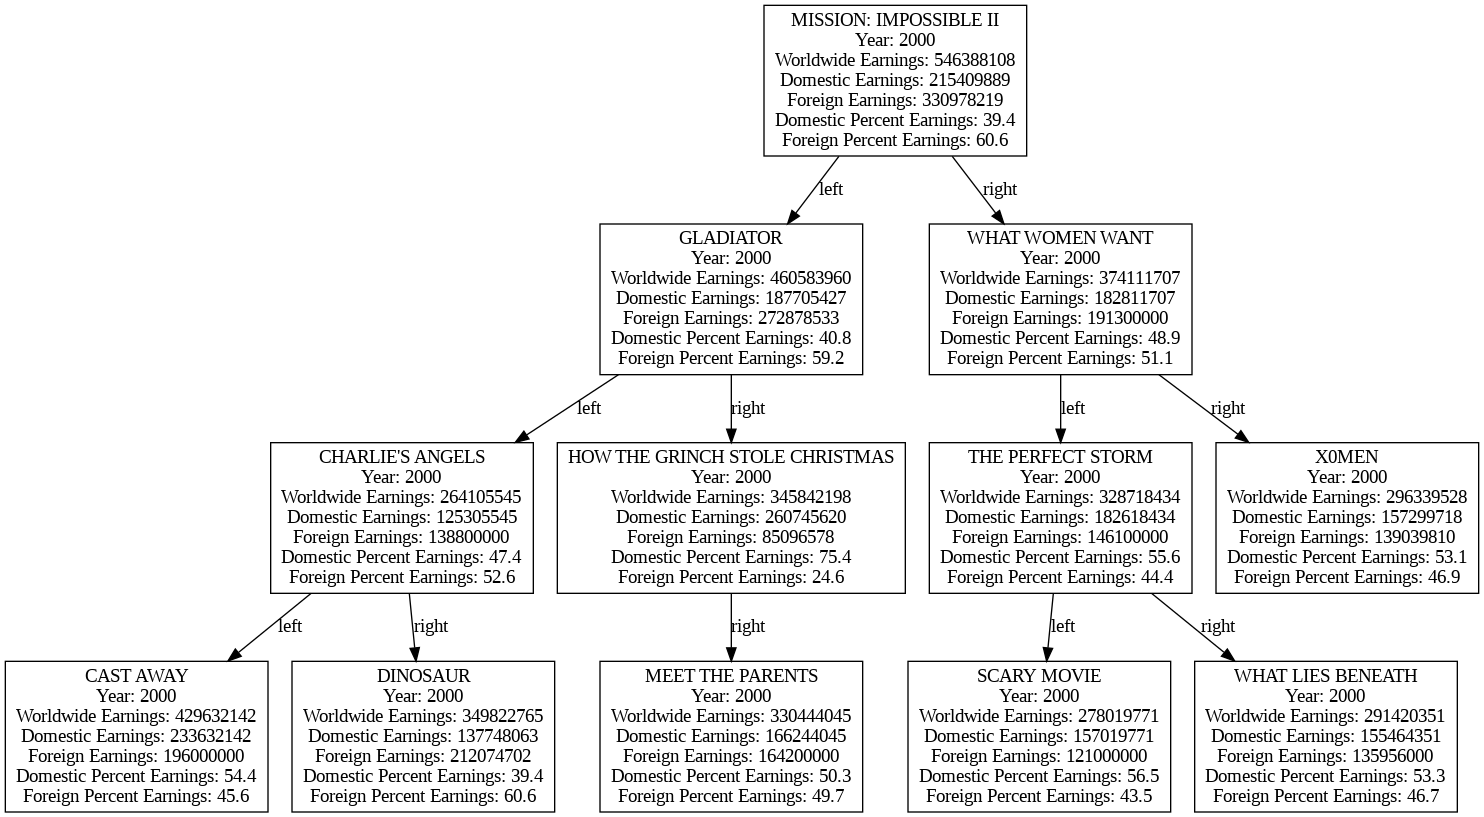

True


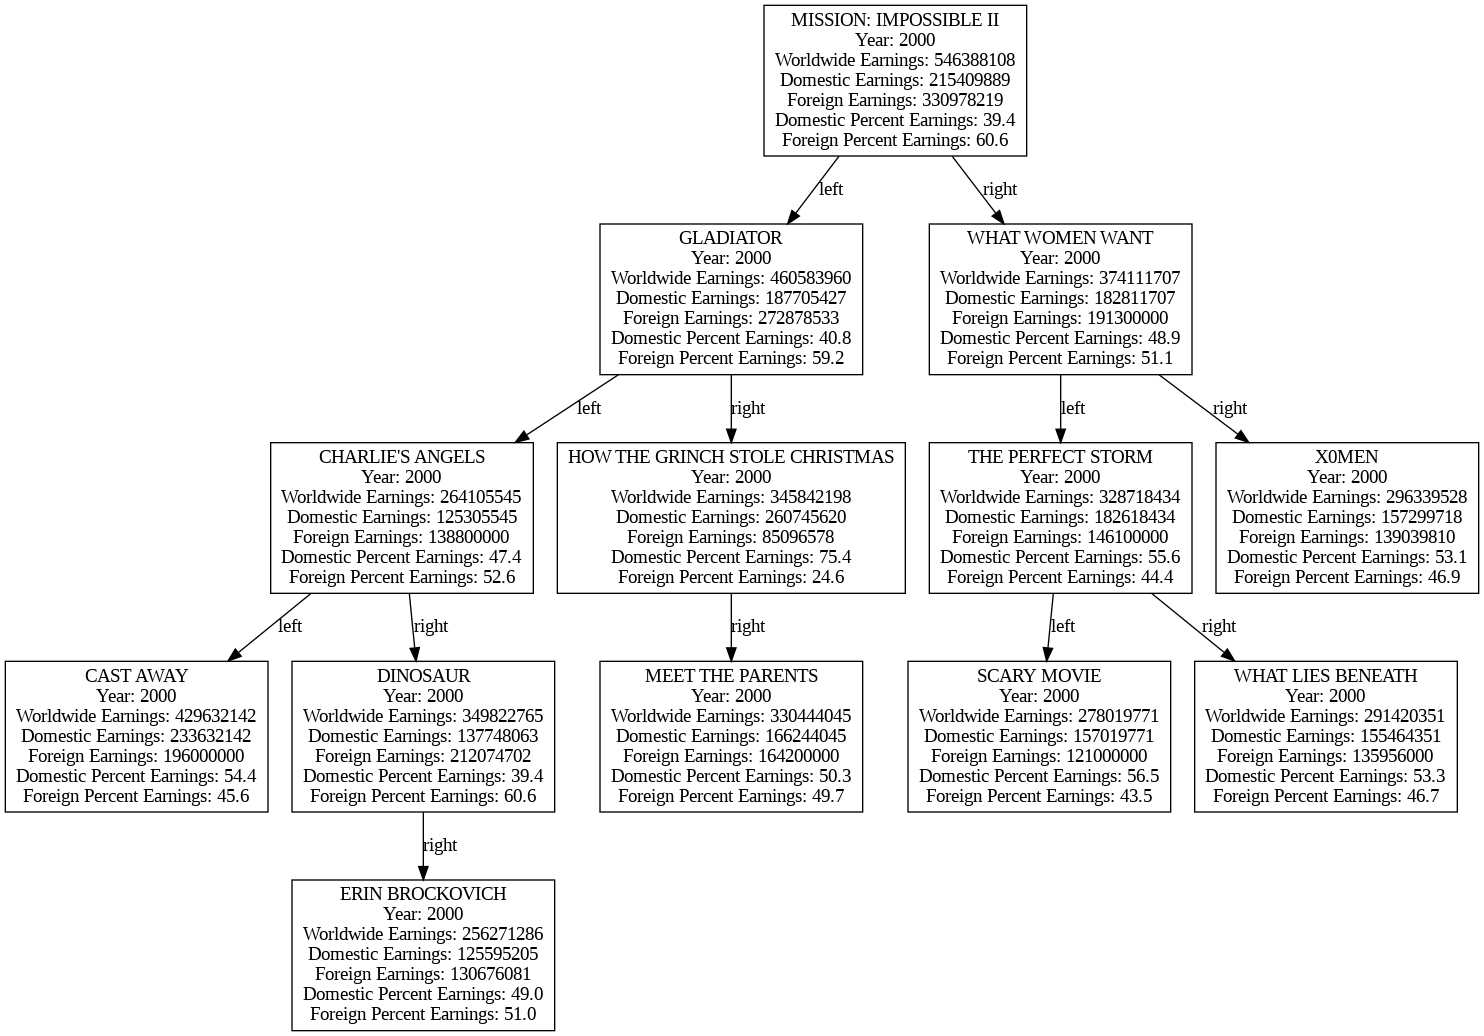

True


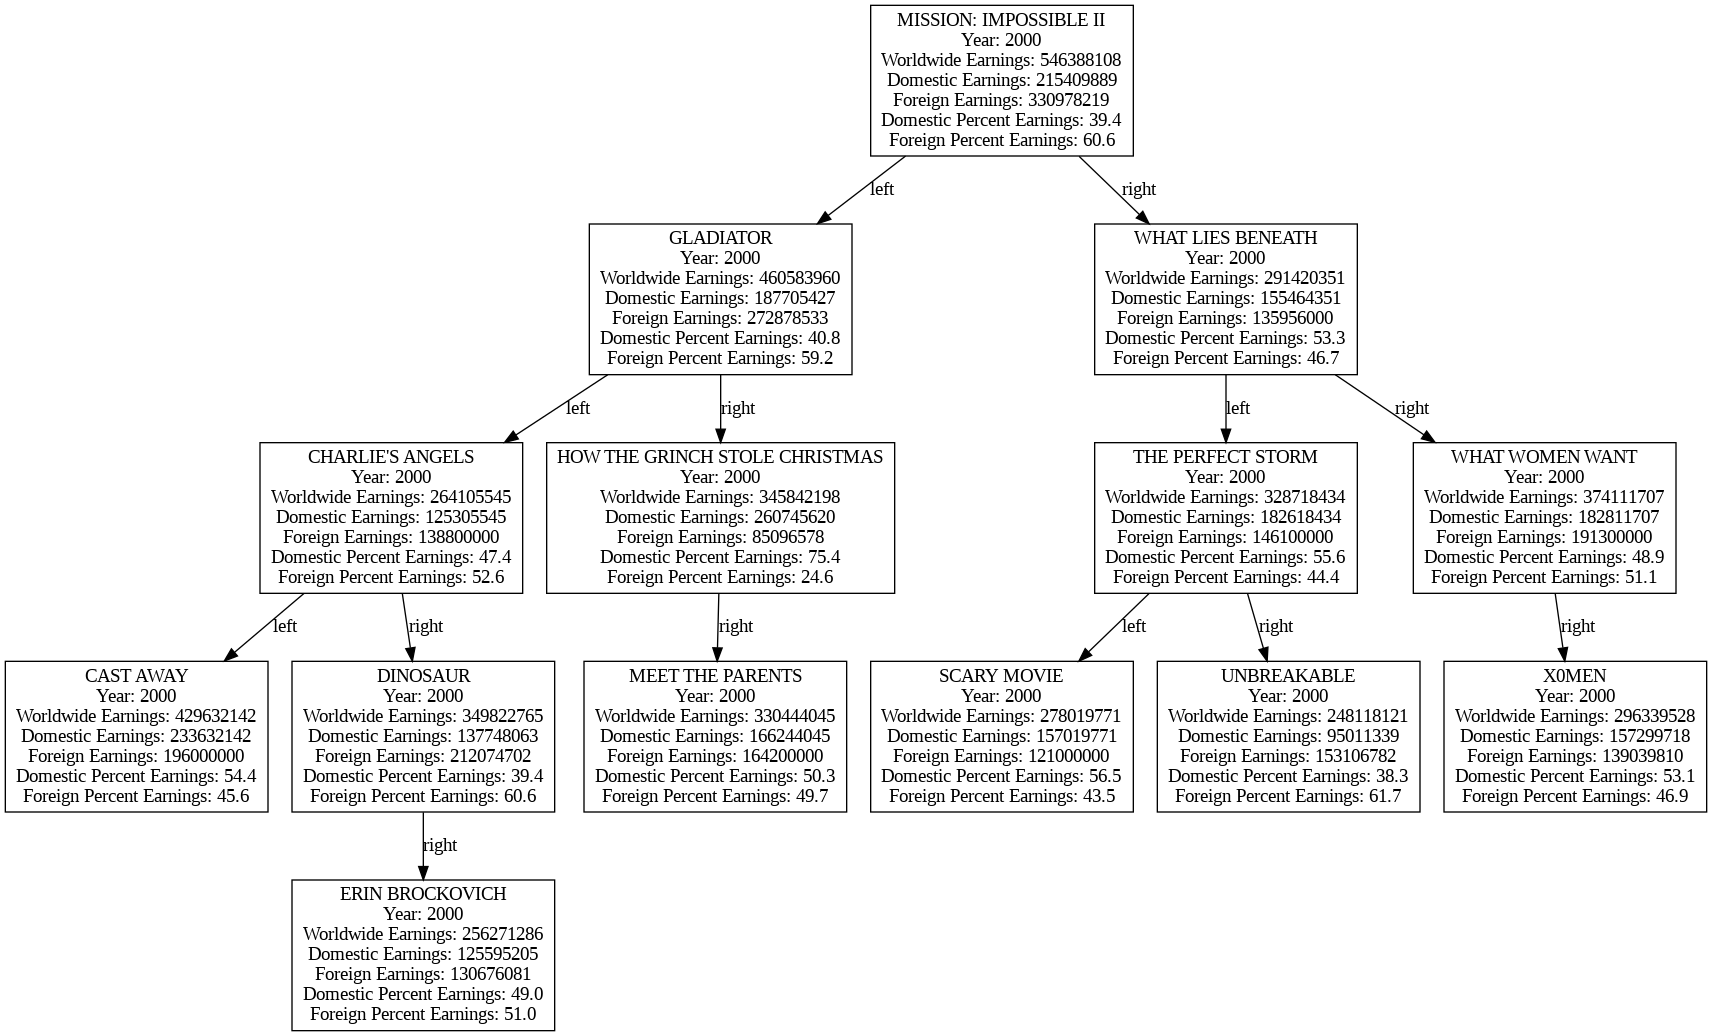

True


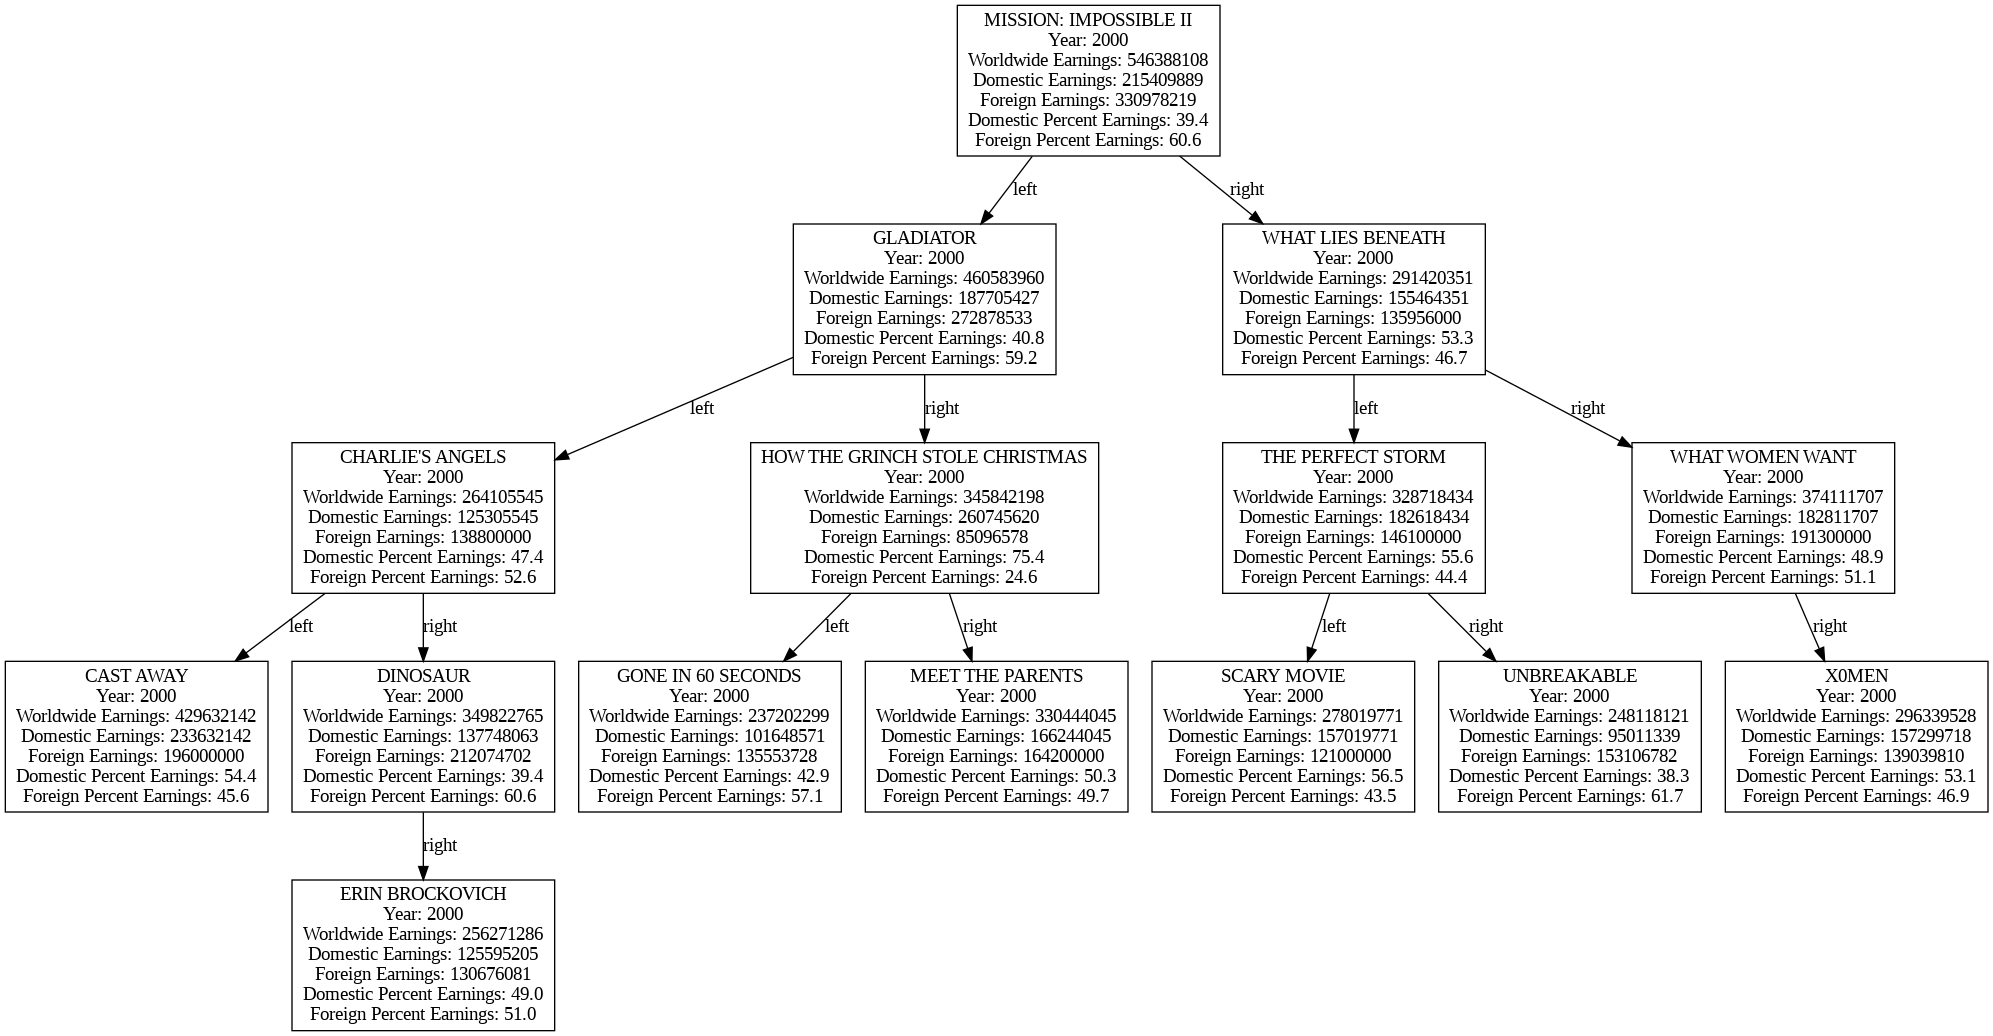

True


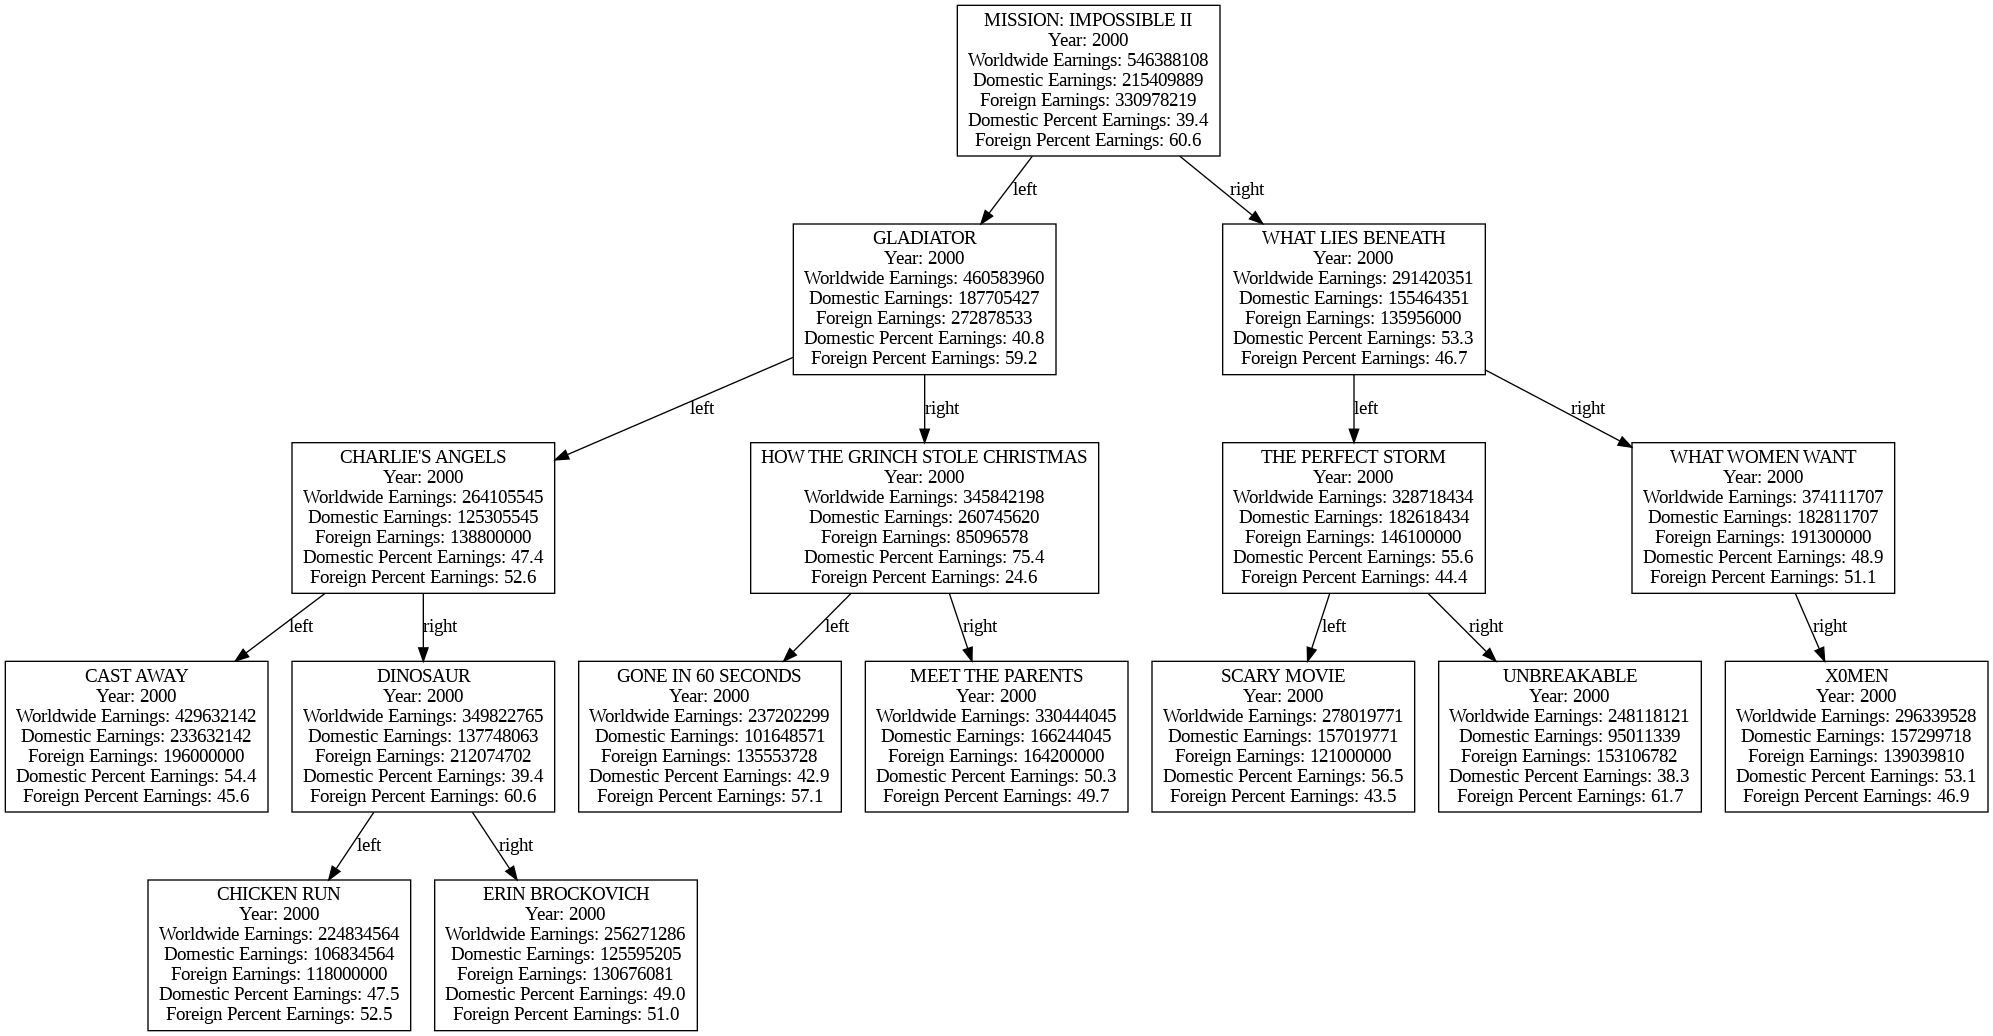

True


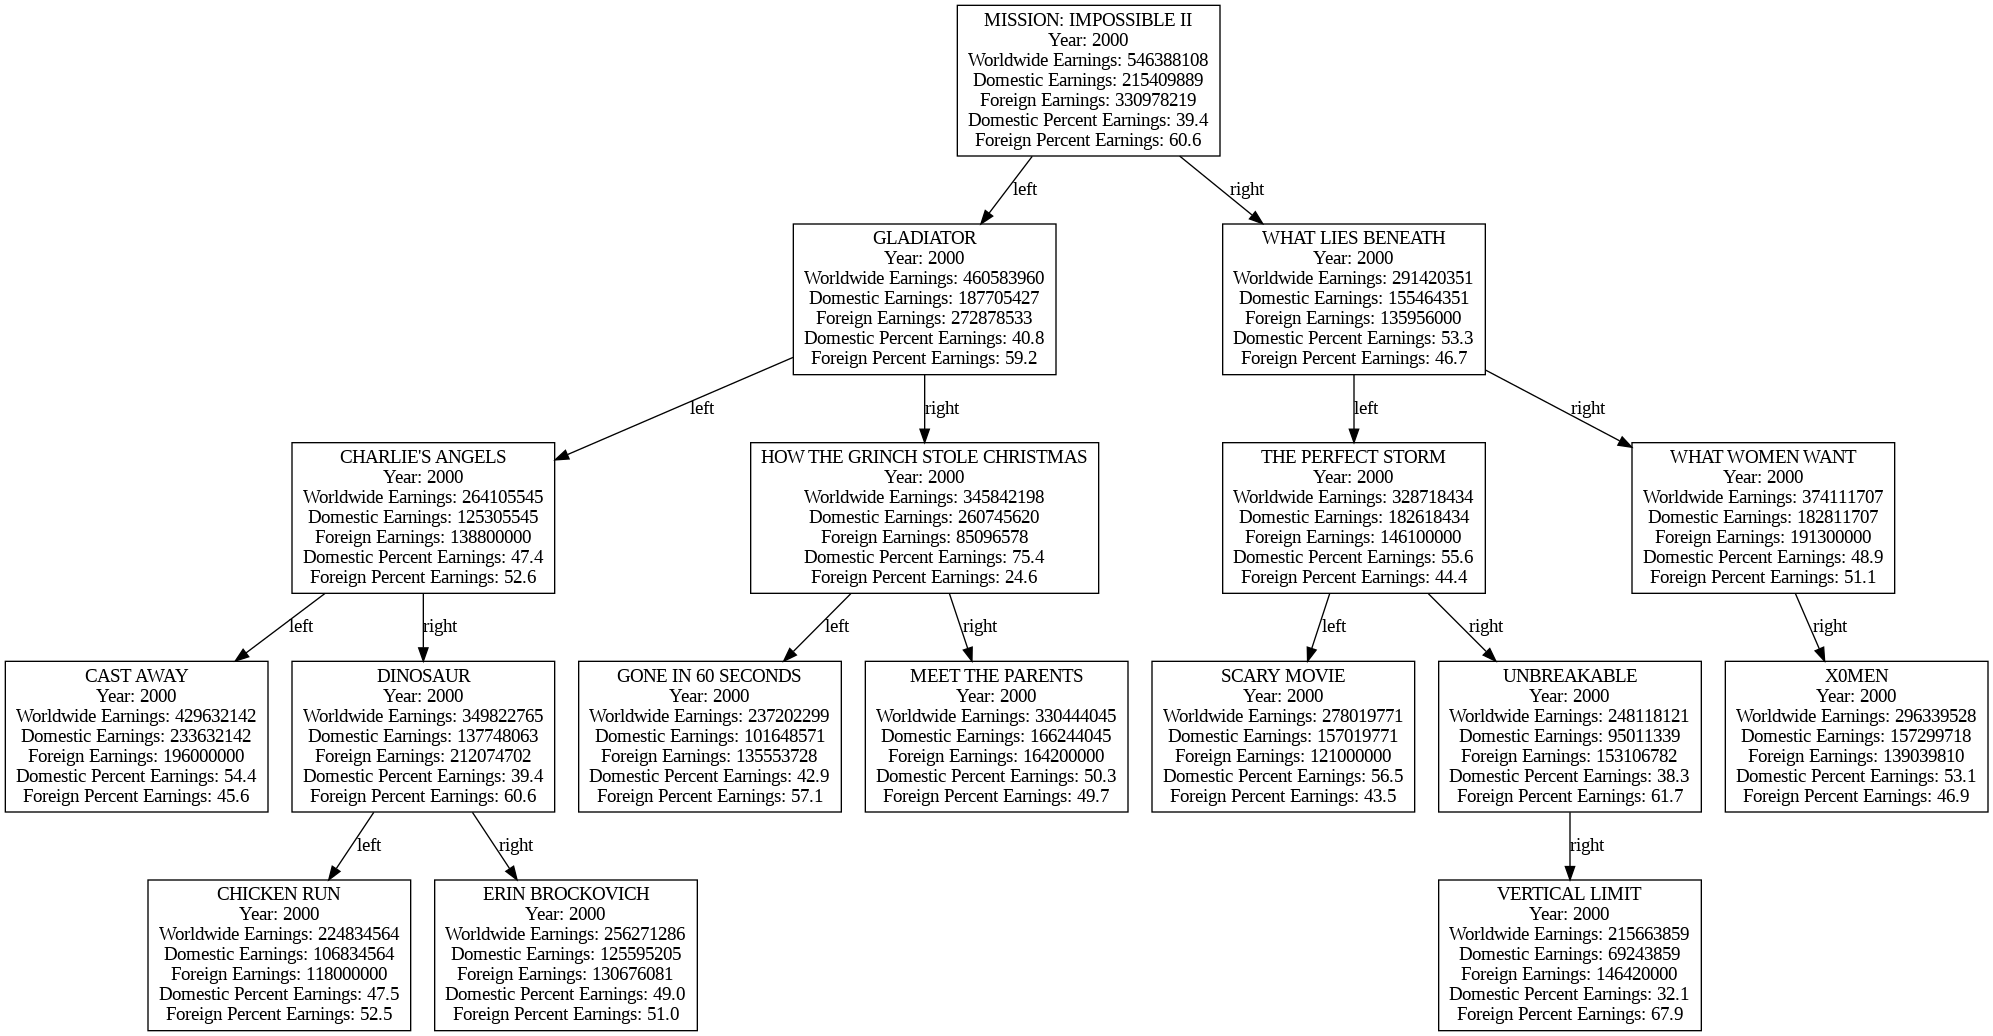

True


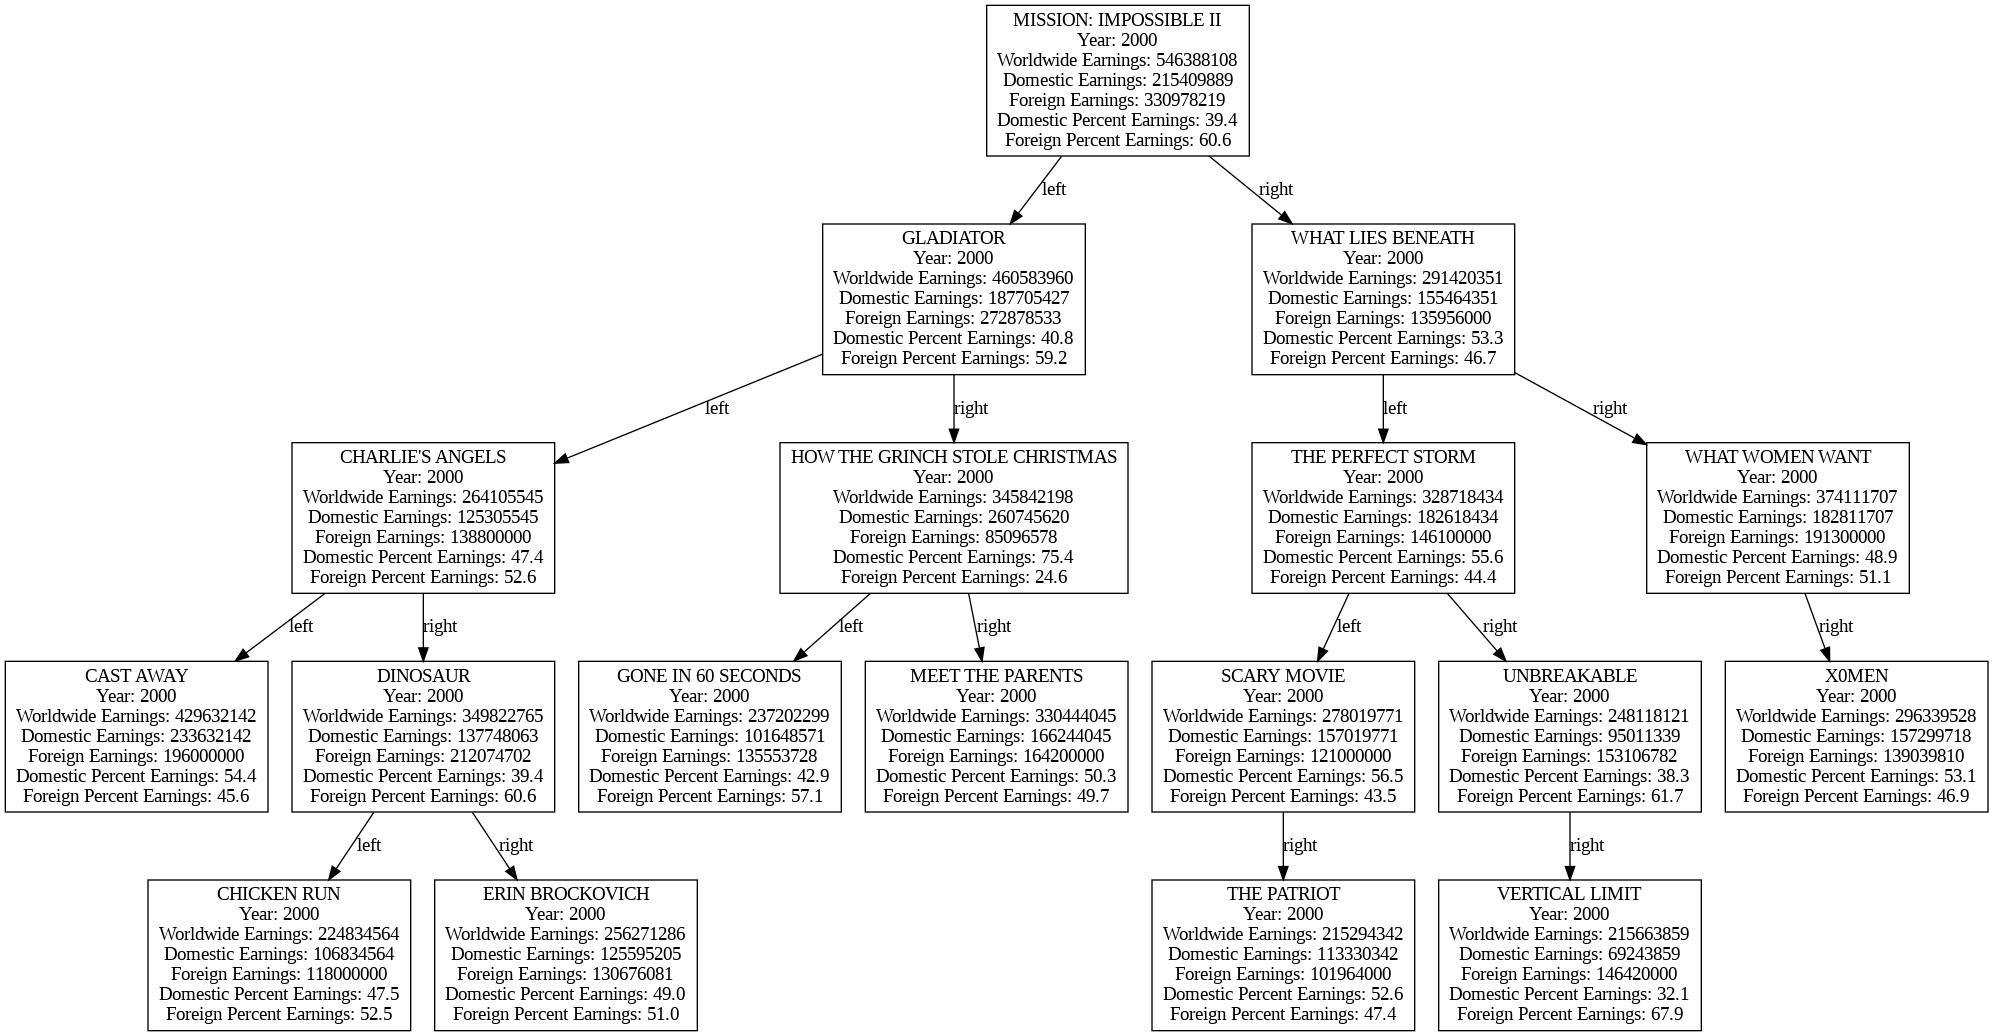

True


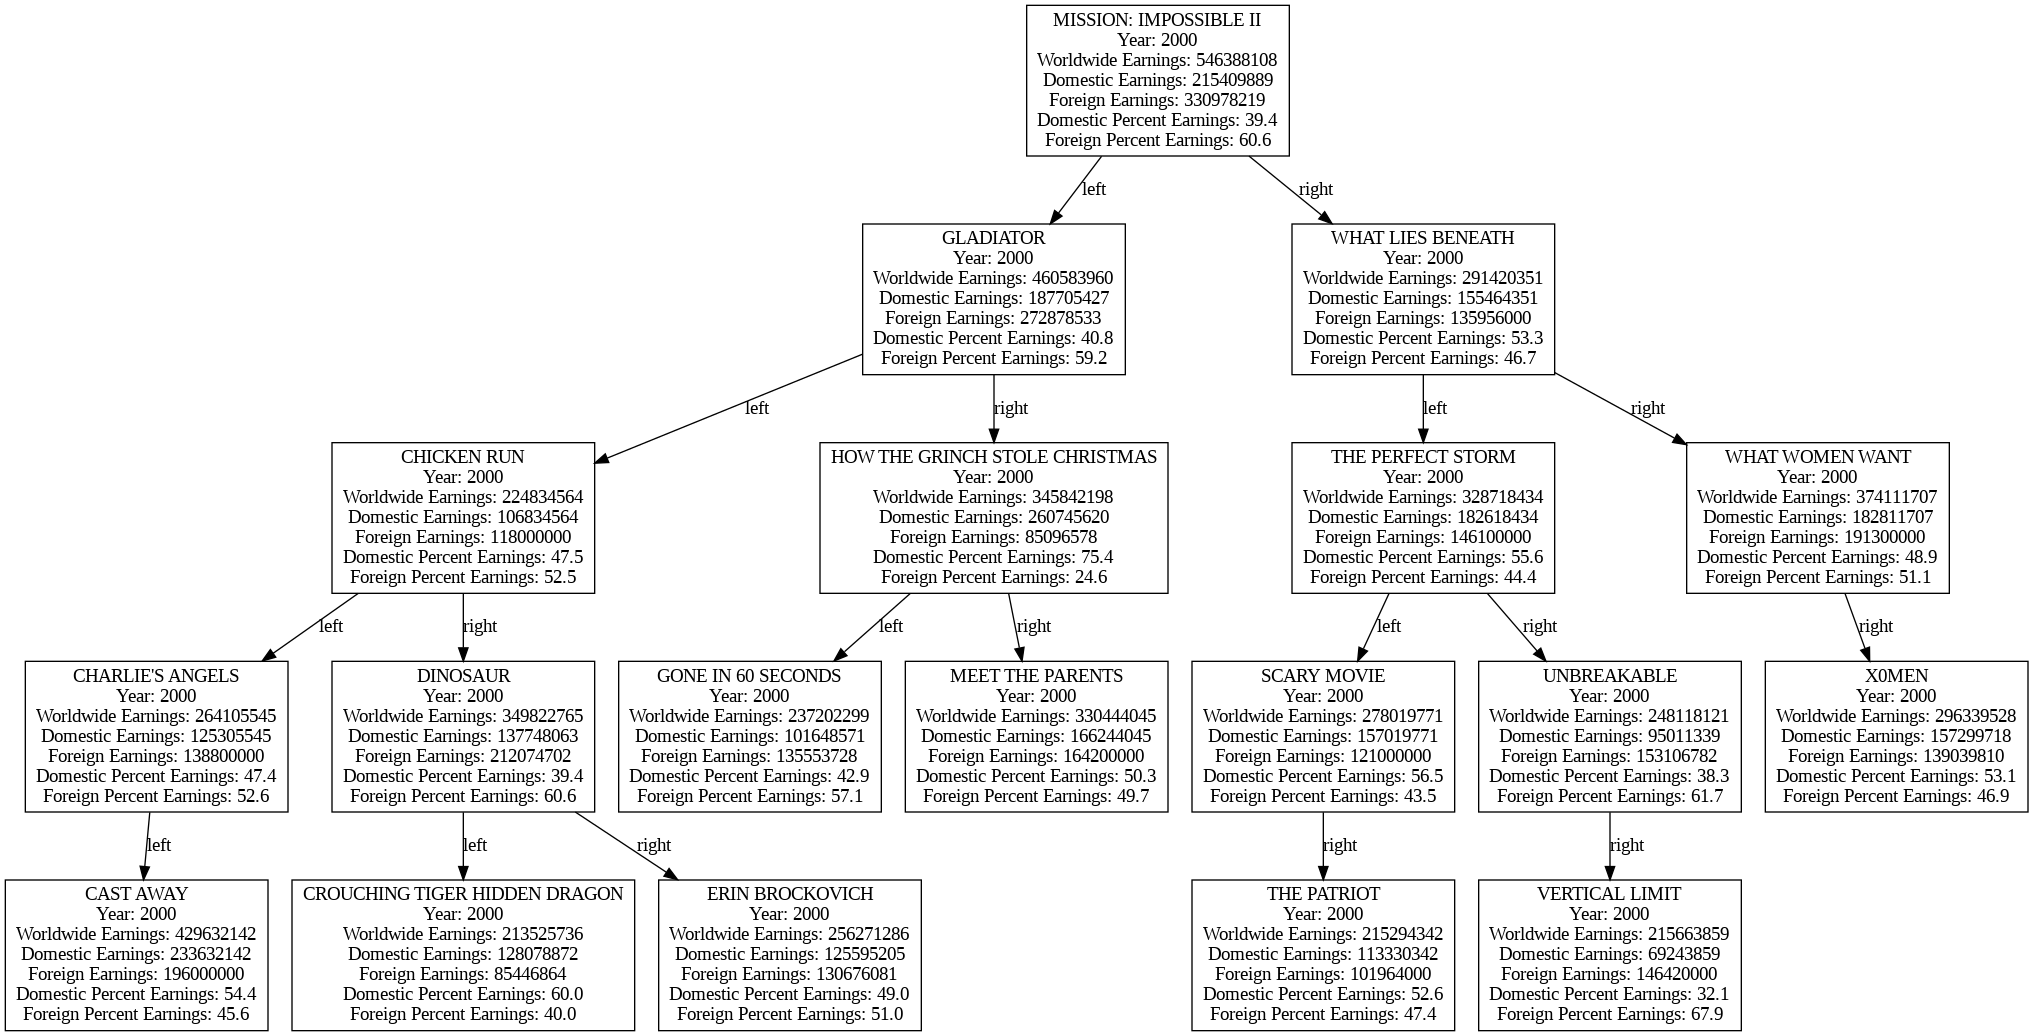

True


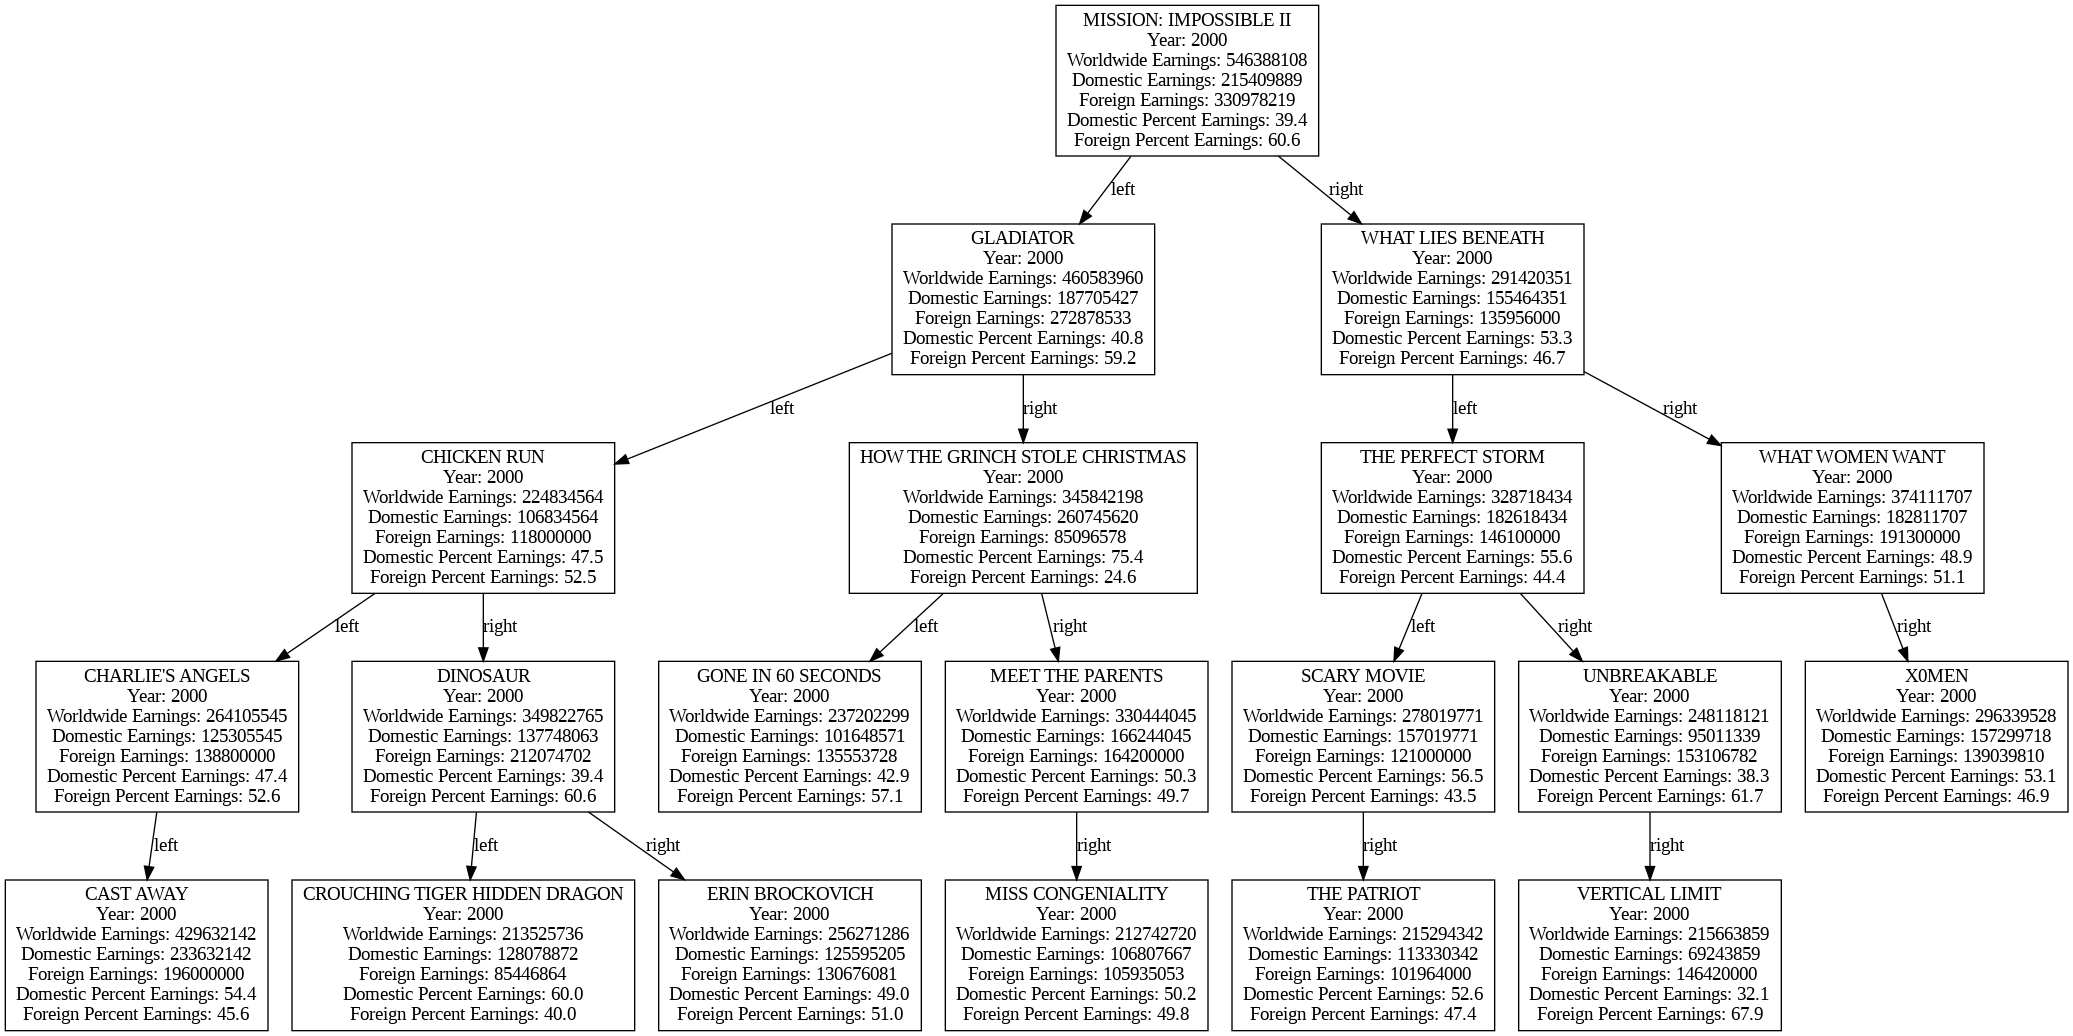

True


In [ ]:
# print(avl.insert("mission: impossible II"))
# print(avl.insert(dataf["Title"][1]))

# print(avl.insert(dataf["Title"][2]))

# print(avl.insert(dataf["Title"][3]))
# print(avl.insert(dataf["Title"][4]))
# print(avl.insert(dataf["Title"][5]))
for i in range(20):
  print(dataf["Title"][i])

for i in range(20):
  print(avl.insert(dataf["Title"][i]))

Recorrido por niveles recursivo

In [ ]:
avl.levels()
#print(avl.root.name)


MISSION: IMPOSSIBLE II ,GLADIATOR ,WHAT LIES BENEATH ,CHICKEN RUN ,HOW THE GRINCH STOLE CHRISTMAS ,THE PERFECT STORM ,WHAT WOMEN WANT ,CHARLIE'S ANGELS ,DINOSAUR ,GONE IN 60 SECONDS ,MEET THE PARENTS ,SCARY MOVIE ,UNBREAKABLE ,X0MEN ,CAST AWAY ,CROUCHING TIGER HIDDEN DRAGON ,ERIN BROCKOVICH ,MISS CONGENIALITY ,THE PATRIOT ,VERTICAL LIMIT ,

Nivel de un nodo

In [ ]:
busq=avl.search_node("gladiator")
niv=avl.node_level(busq)
if(niv==-1):
  print("Esta película no está en el árbol")
else:
  print("El nivel del nodo es: "+str(niv))

El nivel del nodo es: 1


Factor de balanceo de un nodo

In [ ]:
avl.balance_node(avl.root)
busq=avl.search_node("cast away")
avl.balance_factor(busq)

0


Padre ,tio y abuelo del nodo

In [ ]:
nodobusq=avl.search_node("gladiator")
if(nodobusq is None):
  print("Esta película no está en el árbol")
else:
  print("El nivel del nodo es: "+str(avl.node_level(nodobusq)))
  print("Su factor de balanceo es: ")
  avl.balance_factor(nodobusq)
  avl.abu_tio_padre(nodobusq.name)

El nivel del nodo es: 1
Su factor de balanceo es: 
0
GLADIATOR
Su padre es :MISSION: IMPOSSIBLE II
No tiene abuelo
No tiene tio


In [ ]:
avl.height(avl.root)


5

Lista de los nodos con los requerimientos del punto 4

In [ ]:
p=avl.multiple_search(2000, 212074702)
if(len(p)==0):
  print("No se encontraron peliculas con estos requisitos")
else:
  print("Se encontraron "+str(len(p))+" peliculas, seleccione una ")
  for i in p:
    print(i.name)
  pel=str(input())
  nodobusq=avl.search_node(pel)
  print("El nivel del nodo es: "+str(avl.node_level(nodobusq)))
  print("Su factor de balanceo es: ")
  avl.balance_factor(nodobusq)
  avl.abu_tio_padre(nodobusq.name)



Se encontraron 3 peliculas, seleccione una 
MISSION: IMPOSSIBLE II
GLADIATOR
DINOSAUR
gladiator
El nivel del nodo es: 1
Su factor de balanceo es: 
0
GLADIATOR
Su padre es :MISSION: IMPOSSIBLE II
No tiene abuelo
No tiene tio


In [ ]:
avl.balance_node(avl.root)

#avl.auto_balance(avl.root)
print(avl.root.balance)

Eliminar un nodo

In [ ]:
avl.delete("dinosaur")

